# GRIP : The Sparks Foundation
# Data Science and Business Analyst Intern
# Author : Yashraj Rai
# Task 1 : Prediction Using Supervised Machine Learning


In this task we have to predict the percentage of an student based on the no. of study hours.
In the given task we have to use 2 variables where the 1st feature is no of hours studied and the target value is the percentage score.
This given task can be solved using Simple Linear regression

In [2]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Reading data from remote Url


In [7]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

# Data Exploaration


In [10]:
print(data.shape)
print("Data imported successfully")
data.head(15)


(25, 2)
Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# VISUALISATION OF DATA

<function matplotlib.pyplot.show(close=None, block=None)>

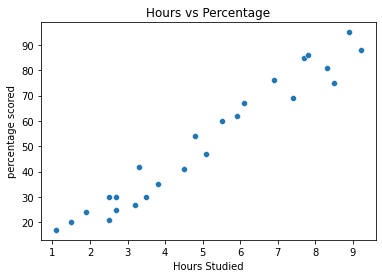

In [11]:
import seaborn as sns
sns.scatterplot(x='Hours', y='Scores', data=data)
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('percentage scored')
plt.show

There is a positive linear relation between the scores and the number of hours studied.

# DATA PREPARATION
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [21]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

We first split the data into training data set and testing data set and then train the algorithm.

In [22]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)


# MODEL TRAINING

In [27]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [28]:
print("Training complete.")

Training complete.


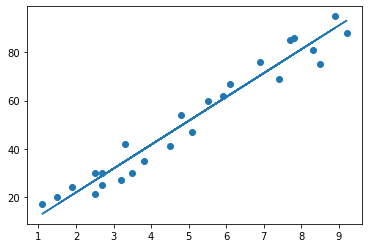

In [29]:
# Plotting the regression line
line = model.coef_*x+model.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line);
plt.show()

# PREDICTING PART

Now that we have trained our model, prediction can be done.

In [32]:
#prediction using test data
print(x_test) # Testing data - In Hours
y_pred = model.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [33]:
# COMPARISON OF ACTUAL AND PREDICTED VALUES
res_data =pd.DataFrame({'Actual_value': y_test, 'Predicted_value': y_pred})
res_data

,Actual_value,Predicted_value
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# EVALUATING THE MODEL

Now that the training of the data is complete, evaluation of model performance on unseen or test data is to be done.

In [34]:
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
Mean Absolute Error: 4.183859899002975


# PREDICTED SCORE IF A STUDENT STUDIES FOR 9.25 HOURS PER DAY

In [35]:
hours = np.array([[9.25]])
prediction = model.predict(hours)
print('No of hours ={}'. format(hours))
print('Predicted score={}'.format(prediction[0]))

No of hours =[[9.25]]
Predicted score=93.69173248737538


From the above result it is clear that if a student studies for 9.25 hours then the predicted score will be 93.69173

# PREDICTED SCORE IF A STUDENT DOES NOT STUDIES FOR 9.25 HOURS PER DAY

In [36]:
hours = np.array([[8.25]])
prediction = model.predict(hours)
print('No of hours ={}'. format(hours))
print('Predicted score={}'.format(prediction[0]))

No of hours =[[8.25]]
Predicted score=83.78107600673313


From the above result it is clear that if a student does not studies for 9.25 hours then the predicted score will be 83.7810 and there is a significant drop off in the predicted value.